In [0]:
#SHAP Explanations CIFAR 100

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
from keras.models import load_model

model = load_model("/content/gdrive/My Drive/8th Semester Project/cifar100.h5")

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 128)       147584    
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 128)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 256)       295168    
_________________________________________________________________
activation_11 (Activation)   (None, 15, 15, 256)       0         
__________

In [0]:
import keras
from keras.datasets import cifar100

In [0]:
import os
import pickle
import numpy as np

In [7]:
num_classes = 100

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.

169009152/169001437 [==============================] - 31s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [8]:
!pip install shap

    100% |████████████████████████████████| 225kB 16.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/3a/5d/18/1f604dd6b90e4e9059263f4c589d57934c0efbf6c726b75898
Successfully built shap


In [0]:
import shap

In [0]:
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

In [0]:
explainer = shap.DeepExplainer(model, background)

In [0]:
import matplotlib.pyplot as plt

In [13]:
import skimage.color

try:
    import matplotlib.pyplot as pl
    import matplotlib
    from matplotlib.colors import LinearSegmentedColormap

    def lch2rgb(x):
        return skimage.color.lab2rgb(skimage.color.lch2lab([[x]]))[0][0]

    # define our colors using Lch
    # note that we intentionally vary the lightness during interpolation so as to better
    # enable the eye to see patterns (since patterns are most easily recognized through
    # lightness variability)
    blue_lch = [54., 70., 4.6588]
    l_mid = 40.
    red_lch = [54., 90., 0.35470565 + 2* np.pi]
    gray_lch = [55., 0., 0.]
    blue_rgb = lch2rgb(blue_lch)
    red_rgb = lch2rgb(red_lch)
    gray_rgb = lch2rgb(gray_lch)

    # define a perceptually uniform color scale using the Lch color space
    reds = []
    greens = []
    blues = []
    alphas = []
    nsteps = 100
    l_vals = list(np.linspace(blue_lch[0], l_mid, nsteps/2)) + list(np.linspace(l_mid, red_lch[0], nsteps/2))
    c_vals = np.linspace(blue_lch[1], red_lch[1], nsteps)
    h_vals = np.linspace(blue_lch[2], red_lch[2], nsteps)
    for pos,l,c,h in zip(np.linspace(0, 1, nsteps), l_vals, c_vals, h_vals):
        lch = [l, c, h]
        rgb = lch2rgb(lch)
        reds.append((pos, rgb[0], rgb[0]))
        greens.append((pos, rgb[1], rgb[1]))
        blues.append((pos, rgb[2], rgb[2]))
        alphas.append((pos, 1.0, 1.0))

    red_blue = LinearSegmentedColormap('red_blue', {
        "red": reds,
        "green": greens,
        "blue": blues,
        "alpha": alphas
    })
    red_blue.set_bad(gray_rgb, 1.0)
    red_blue.set_over(gray_rgb, 1.0)
    red_blue.set_under(gray_rgb, 1.0) # "under" is incorrectly used instead of "bad" in the scatter plot

    red_blue_no_bounds = LinearSegmentedColormap('red_blue_no_bounds', {
        "red": reds,
        "green": greens,
        "blue": blues,
        "alpha": alphas
    })

    # define a circular version of the color scale for categorical coloring
    reds = []
    greens = []
    blues = []
    alphas = []
    nsteps = 100
    c_vals = np.linspace(blue_lch[1], red_lch[1], nsteps)
    h_vals = np.linspace(blue_lch[2], red_lch[2], nsteps)
    for pos,c,h in zip(np.linspace(0, 0.5, nsteps), c_vals, h_vals):
        lch = [blue_lch[0], c, h]
        rgb = lch2rgb(lch)
        reds.append((pos, rgb[0], rgb[0]))
        greens.append((pos, rgb[1], rgb[1]))
        blues.append((pos, rgb[2], rgb[2]))
        alphas.append((pos, 1.0, 1.0))
    c_vals = np.linspace(red_lch[1], blue_lch[1], nsteps)
    h_vals = np.linspace(red_lch[2] - 2 * np.pi, blue_lch[2], nsteps)
    for pos,c,h in zip(np.linspace(0.5, 1, nsteps), c_vals, h_vals):
        lch = [blue_lch[0], c, h]
        rgb = lch2rgb(lch)
        reds.append((pos, rgb[0], rgb[0]))
        greens.append((pos, rgb[1], rgb[1]))
        blues.append((pos, rgb[2], rgb[2]))
        alphas.append((pos, 1.0, 1.0))

    red_blue_circle = LinearSegmentedColormap('red_blue_circle', {
        "red": reds,
        "green": greens,
        "blue": blues,
        "alpha": alphas
    })

    colors = []
    for l in np.linspace(1, 0, 100):
        colors.append((30./255, 136./255, 229./255,l))
    for l in np.linspace(0, 1, 100):
        colors.append((255./255, 13./255, 87./255,l))
    red_transparent_blue = LinearSegmentedColormap.from_list("red_transparent_blue", colors)

    colors = []
    for l in np.linspace(0, 1, 100):
        colors.append((30./255, 136./255, 229./255,l))
    transparent_blue = LinearSegmentedColormap.from_list("transparent_blue", colors)

    colors = []
    for l in np.linspace(0, 1, 100):
        colors.append((255./255, 13./255, 87./255,l))
    transparent_red = LinearSegmentedColormap.from_list("transparent_red", colors)


except ImportError:
    pass

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


In [0]:
def image_plot(shap_values, x, labels=None, show=True):
    """ Plots SHAP values for image inputs.
    """

    multi_output = True
    if type(shap_values) != list:
        multi_output = False
        shap_values = [shap_values]

    # make sure labels
    if labels is not None:
        assert labels.shape[0] == shap_values[0].shape[0], "Labels must have same row count as shap_values arrays!"
        if multi_output:
            assert labels.shape[1] == len(shap_values), "Labels must have a column for each output in shap_values!"
        else:
            assert len(labels.shape) == 1, "Labels must be a vector for single output shap_values."

    # plot our explanations
    fig_size = np.array([3 * (len(shap_values) + 1), 2.5 * (x.shape[0] + 1)])
    if fig_size[0] > 20:
        fig_size *= 20 / fig_size[0]
    fig, axes = plt.subplots(nrows=x.shape[0], ncols=len(shap_values) + 1, figsize=fig_size)
    if len(axes.shape) == 1:
        axes = axes.reshape(1,axes.size)
    for row in range(x.shape[0]):
        x_curr = x[row].copy()

        # make sure
        if len(x_curr.shape) == 3 and x_curr.shape[2] == 1:
            x_curr = x_curr.reshape(x_curr.shape[:2])
        if x_curr.max() > 1:
            x_curr /= 255.

        # get a grayscale version of the image
        if len(x_curr.shape) == 3 and x_curr.shape[2] == 3:
            x_curr_gray = (0.2989 * x_curr[:,:,0] + 0.5870 * x_curr[:,:,1] + 0.1140 * x_curr[:,:,2]) # rgb to gray
        else:
            x_curr_gray = x_curr

        axes[row,0].imshow(x_curr, cmap=plt.get_cmap('gray'))
        axes[row,0].axis('off')
        if len(shap_values[0][row].shape) == 2:
            abs_vals = np.stack([np.abs(shap_values[i]) for i in range(len(shap_values))], 0).flatten()
        else:
            abs_vals = np.stack([np.abs(shap_values[i].sum(-1)) for i in range(len(shap_values))], 0).flatten()
        max_val = np.nanpercentile(abs_vals, 99.9)
        for i in range(len(shap_values)):
            if labels is not None:
                axes[row,i+1].set_title(labels[row,i])
            sv = shap_values[i][row] if len(shap_values[i][row].shape) == 2 else shap_values[i][row].sum(-1)
            axes[row,i+1].imshow(x_curr_gray, cmap=plt.get_cmap('gray'), alpha=0.15, extent=(-1, sv.shape[0], sv.shape[1], -1))
            im = axes[row,i+1].imshow(sv, cmap=red_transparent_blue, vmin=-max_val, vmax=max_val)
            axes[row,i+1].axis('off')
    cb = fig.colorbar(im, ax=np.ravel(axes).tolist(), label="SHAP value", orientation="horizontal", aspect=fig_size[0]/0.2)
    cb.outline.set_visible(False)
    if show:
        plt.show()
    
    return fig,axes

In [0]:
shap_values = explainer.shap_values(x_test[6:7])

In [0]:
labels = labels = [str(i) for i in range(100)]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


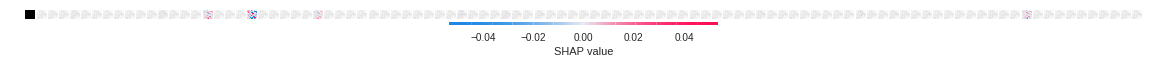

In [84]:
fig,axes = image_plot(shap_values, -x_test[6:7])

In [0]:
import random

In [0]:
def return_explanation_image(img):
  img = img.reshape(1,32,32,3)
  shap_values_ = explainer.shap_values(img, ranked_outputs = 1)
  shap_values_top = shap_values_[0]
  fig,axes = image_plot(shap_values_top, -img)
  axes_from_fig = fig.get_axes()
  extent = axes_from_fig[1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
  fig.savefig("test.jpeg", bbox_inches=extent) 
  img1 = cv2.imread('test.jpeg')
  
  return img1

In [0]:
exp1 = return_explanation_image(x_test[9])

Text(0.5, 1.0, 'Explanation Image')

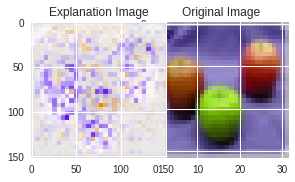

In [200]:
fig= plt.figure()

(ax1) = fig.add_subplot(2,1,1)
ax1.imshow(x_test[9], interpolation = 'nearest')
ax1.set_title('Original Image')

(ax2) = fig.add_subplot(2,2,1)
ax2.imshow(exp1)
ax2.set_title('Explanation Image')

In [0]:
def noisy(image):
  noises = ["s&p","poisson"]
  
  idx = random.randint(0,1)
  noise_typ = noises[idx]
  
  print(noise_typ)

  if noise_typ == "s&p":
      row,col,ch = image.shape
      s_vs_p = 0.5
      amount = 0.01
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out
  
  elif noise_typ == "poisson":
      vals = len(np.unique(image))
      vals = 2 ** np.ceil(np.log2(vals))
      noisy = np.random.poisson(image * vals) / float(vals)
      return noisy

In [0]:
from skimage.measure import structural_similarity as ssim

In [0]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [0]:
def compare_images(imageA, imageB, title):
  # compute the mean squared error and structural similarity
  # index for the images
  m = mse(imageA, imageB)
  s = ssim(imageA, imageB,multichannel=True)

  # setup the figure
  fig = plt.figure(title)
  plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))

  # show first image
  ax = fig.add_subplot(1, 2, 1)
  plt.imshow(imageA, cmap = plt.cm.gray)
  plt.axis("off")

  # show the second image
  ax = fig.add_subplot(1, 2, 2)
  plt.imshow(imageB, cmap = plt.cm.gray)
  plt.axis("off")

  # show the images
  plt.show() 
  return m,s

In [0]:
stabilities = []

In [0]:
for i in range(100):
  try:
    original_image_explanation = return_explanation_image(x_test[i])

    noisy_input = noisy(x_test[i])

    noisy_image_explanation = return_explanation_image(noisy_input)

    m1,s1 = compare_images(x_test[i],noisy_input,"Original Images")
    m2,s2 = compare_images(original_image_explanation,noisy_image_explanation,"Explanations")

    stability = s2/s1

    stabilities.append(stability)
  except ValueError:
    print("Done for ",i,'/',100)
    continue

In [0]:
mean_stab = sum(stabilities)/len(stabilities)

In [184]:
mean_stab

0.33760447311946495